data generation function

In [2]:
import numpy as np
from numpy import random

def generate_data(centers,sd):
    #loc=mean , sd=2
    all_data = []

    for c in centers:
        y = random.normal(loc=c, scale=sd, size=(100, 2))
        all_data.append(y)

    concatenated_data = np.concatenate(all_data, axis=0)
    #concatenated_data.shape
    return concatenated_data

    

In [3]:
# k == number of prototypes
def initialize_prototypes(k):
    return np.random.rand(k, 2)

#np.linalg > calculates the Euclidean distance
def assign_clusters(data, prototypes):
    distances = np.linalg.norm(data[:, np.newaxis, :] - prototypes, axis=2)
    return np.argmin(distances, axis=1)

def update_prototypes(data, clusters, k):
    new_prototypes = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_prototypes[i] = cluster_points.mean(axis=0)
        else:  # Handle empty cluster by reinitializing
            new_prototypes[i] = np.random.rand(data.shape[1])
    return new_prototypes

visualizition


In [4]:
import matplotlib.pyplot as plt
def visualize(data, clusters, prototypes, errors):
    plt.figure(figsize=(12, 5))

    # Scatter plot of clusters
    plt.subplot(1, 2, 1)
    for i in range(len(prototypes)):
        cluster_points = data[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")
    plt.scatter(prototypes[:, 0], prototypes[:, 1], color='black', marker='x', s=100, label='Prototypes')
    plt.title('Clusters and Prototypes')
    plt.legend()

    # Error plot
    plt.subplot(1, 2, 2)
    plt.plot(errors, marker='o')
    plt.title('Error vs. Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Average Quadratic Error')

    plt.tight_layout()
    plt.show()

In [5]:

def compute_error(data, clusters, prototypes):
    error = 0
    for i in range(len(prototypes)):
        cluster_points = data[clusters == i]
        #print(cluster_points)
        error += np.sum(np.linalg.norm(cluster_points - prototypes[i], axis=1) ** 2)
    return error / len(data)

main code

In [6]:
# main code

centers = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])  # Cluster centers/ means
data_set=generate_data(centers,0.5)
print(data_set[0:20])

prototypes=initialize_prototypes(4)
print(prototypes)
clustered_data=assign_clusters(data_set, prototypes)
print(clustered_data)

updated_p=update_prototypes(data_set, clustered_data, 4)

quadradic_error=compute_error(data_set,clustered_data,prototypes)

[[-0.13907339  0.31006963]
 [-0.63174273  0.42347889]
 [-0.34190046  0.5492344 ]
 [-0.55437394  1.36453157]
 [-0.41120794  0.38279088]
 [-0.66117146 -0.08919407]
 [ 0.01485703  0.3407831 ]
 [-0.23218662 -0.4056972 ]
 [-0.26966748  0.63483515]
 [ 0.16316665 -0.50175257]
 [-0.67545247  0.73341211]
 [-0.19874101  0.43774586]
 [ 0.34181125 -0.68563224]
 [ 0.6796369   0.78350374]
 [-0.86620666 -0.57928313]
 [ 0.61231379 -1.56211558]
 [-0.11977437 -0.4138413 ]
 [ 0.11198885 -0.04533143]
 [-0.60592631  0.26255528]
 [-0.23535274 -0.59019014]]
[[0.95357422 0.88516844]
 [0.98110665 0.30021905]
 [0.03268489 0.15995183]
 [0.19974082 0.15058141]]
[2 2 2 2 2 2 2 2 2 3 2 2 3 0 2 3 2 3 2 2 3 2 2 1 2 3 1 3 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 3 2 2 1 3 3 3 2 3 1 2 3 2 2 3 2 2 3 3 2 2 3 2 2 3 2 2
 2 2 2 3 2 2 2 2 2 1 3 2 2 3 3 2 2 2 2 2 2 2 2 1 3 2 1 1 3 1 1 1 1 1 3 1 3
 1 1 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 0 1 1 0 0 2 3 1 1 1 0 1 1 1 1
 1 1 1 2 1 3 3 1 1 0 1 1 0 1 3 1 1 0 0 1 1 0 1 0 0 1 3 3 3

In [7]:
def k_means(data, k, max_iterations=100, tolerance=1e-4):
    prototypes = initialize_prototypes(k)
    previous_error = float('inf')
    errors = []

    for iteration in range(max_iterations):
        clusters = assign_clusters(data, prototypes)
        prototypes = update_prototypes(data, clusters, k)
        current_error = compute_error(data, clusters, prototypes)
        errors.append(current_error)

        if abs(previous_error - current_error) / previous_error <= tolerance:
            break

        previous_error = current_error

    return prototypes, clusters, errors


In [12]:
def calculate_theoretical_error():
    std_dev = 0.5  # Standard deviation used in generating data
    expected_error_per_cluster = 2 * (std_dev ** 2)  # Error in x and y directions
    total_expected_error = expected_error_per_cluster * 4  # Four clusters
    return total_expected_error / 4  # Average error per point

# Measure errors on 50 random data records and compare with theoretical value
centers = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])  # Cluster centers/ means
def compare_errors():
    theoretical_error = calculate_theoretical_error()
    measured_errors = []

    for _ in range(50):
        data = generate_data(centers,0.5)
        prototypes, clusters, errors = k_means(data, 4)
        measured_errors.append(errors[-1])

    average_measured_error = np.mean(measured_errors)

    print(f"Theoretical Error: {theoretical_error:.4f}")
    print(f"Average Measured Error: {average_measured_error:.4f}")
    print(f"Systematic Deviation: {average_measured_error - theoretical_error:.4f}")


1)a

C:\Users\sb138\AppData\Local\Temp\ipykernel_4580\2452113826.py:12: RuntimeWarning: invalid value encountered in scalar divide
  if abs(previous_error - current_error) / previous_error <= tolerance:


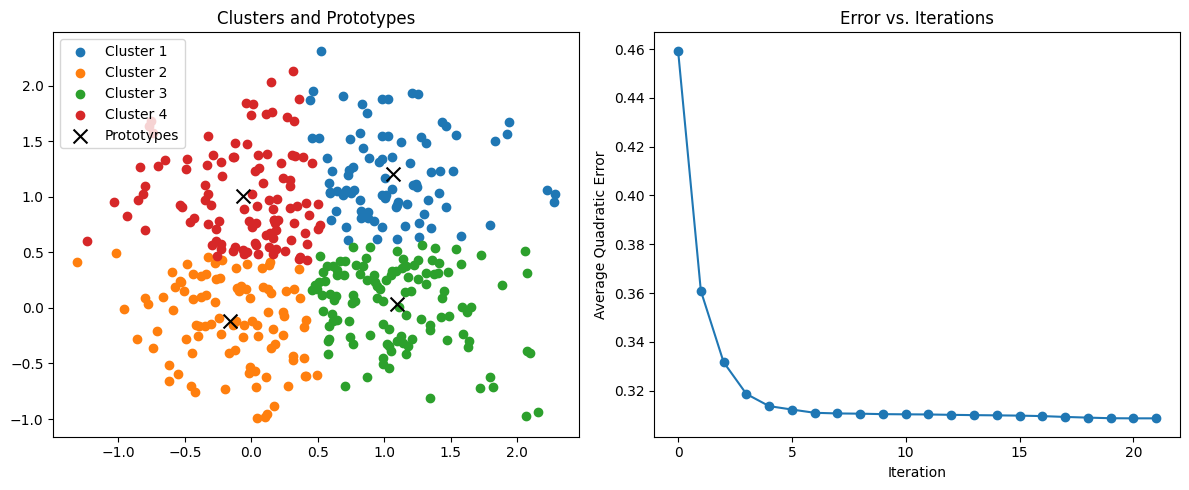

Theoretical Error: 0.5000
Average Measured Error: 0.3191
Systematic Deviation: -0.1809


In [14]:
np.random.seed(42)  # For reproducibility
#data_set=generate_data(centers,0.5)
k = 4  # Number of clusters
centers = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])  # Cluster centers/ means
data_set=generate_data(centers,0.5)
prototypes, clusters, errors = k_means(data_set, k)
visualize(data_set, clusters, prototypes, errors)
compare_errors()

What would theoretically be the expected value of the squared error E at the use of the ideal
prototype vectors and the original assignment according to the generating process?
Is this value practically achieved or do you observe a systematic deviation when you
compare the theoretical value with the observed error value? Compare the measured
errors on 50 random data records with the expected value! What may be the reason
for systematic deviations?


The theoretical error(0.5000) here is expected average quadratic error, which is the average of the squared errors across all points in the dataset. It reflects the overall fit of the clustering algorithm by averaging the squared distances between points and their assigned cluster centers.
It is calculated based on the assumption that each cluster is perfectly represented by its center, and the points are spread around the center according to a normal distribution with a standard deviation of 0.5.

The average measured error (0.3191) is the average of the final average quadratic errors across 50 random datasets. It shows how well the K-means algorithm performs in practice.

Systematic Deviation=0.3191−0.5000= −0.1809

In here we are witnessing a neagtive systematic deviation which can be explained by:

1-Cluster Overfitting: The K-means algorithm is fitting the finite dataset better than expected, potentially overfitting to the data points rather than generalizing to the true distribution.

2-Finite Sample Effects: Theoretical error calculations assume a large number of data points. In a finite dataset, the clusters may appear tighter and better separated, resulting in a lower observed error.

3-Algorithm Behavior: The algorithm itself (i.e how empty clusters are handled and the stopping criteria) might be influencing the final error value.



1)b

In [25]:
 #Initialize prototypes randomly in the unit square
def initialize_prototypes_random(k):
    return np.random.rand(k, 2)

# Alternative initialization: randomly select K points from the data
def initialize_prototypes_from_data(data, k):
    indices = np.random.permutation(len(data))[:k]
    return data[indices]

#revised k-means
def k_means_intialization(data, k, max_iterations=100, tolerance=1e-4, initialization='random'):
    if initialization == 'from_data':
        prototypes = initialize_prototypes_from_data(data, k)
    else:
        prototypes = initialize_prototypes_random(k)

    previous_error = float('inf')
    errors = []
    iteration=0

    while True:
        clusters = assign_clusters(data, prototypes)
        prototypes = update_prototypes(data, clusters, k)
        current_error = compute_error(data, clusters, prototypes)
        errors.append(current_error)

        if abs(previous_error - current_error) / previous_error <= tolerance:
            break
        iteration+=1

        previous_error = current_error
    

    return prototypes, clusters, errors,iteration

# Compare random initialization vs. data-based initialization
def compare_initializations():
    data = generate_data(centers,0.5)
    k = 4

    random_errors = []
    from_data_errors = []
    iteraion_r_list=[]
    iteraion_d_list=[]

    for _ in range(50):
        # Random initialization
        _, _, errors_random,iteration_r = k_means(data, k, initialization='random')
        random_errors.append(errors_random[-1])

        # Initialization from data points
        _, _, errors_from_data,iteration_d = k_means(data, k, initialization='from_data')
        from_data_errors.append(errors_from_data[-1])
        iteraion_r_list.append(iteration_r)
        iteraion_d_list.append(iteration_d)
    print("r",random_errors)
    print("d",from_data_errors)

    print("average number of iterations (From Data Initialization)",np.mean(iteraion_r_list))
    print("average number of iterations (Random Initialization)",np.mean(iteraion_d_list))


    avg_random_error = np.mean(random_errors)
    avg_from_data_error = np.mean(from_data_errors)

    print(f"Average Error (Random Initialization): {avg_random_error:.4f}")
    print(f"Average Error (From Data Initialization): {avg_from_data_error:.4f}")


compare_initializations()


C:\Users\sb138\AppData\Local\Temp\ipykernel_4580\1252244145.py:27: RuntimeWarning: invalid value encountered in scalar divide
  if abs(previous_error - current_error) / previous_error <= tolerance:


r [0.3116883467698354, 0.3116883467698354, 0.33736302316905126, 0.3116917908244139, 0.3369770235368597, 0.3187667312441558, 0.31158697963021176, 0.3116883467698354, 0.31877119350780364, 0.3187667312441558, 0.31877119350780364, 0.31970489655082807, 0.31159519476787567, 0.3196696258769309, 0.31158697963021176, 0.31158697963021176, 0.3189801672135402, 0.3116883467698354, 0.3116883467698354, 0.33760227084337024, 0.3116883467698354, 0.31159519476787567, 0.3116883467698354, 0.31159519476787567, 0.3196696258769309, 0.3116883467698354, 0.31159519476787567, 0.31159519476787567, 0.31165312426884084, 0.3116883467698354, 0.31159519476787567, 0.3116917908244139, 0.3189046113060222, 0.31159519476787567, 0.3116883467698354, 0.3116917908244139, 0.31970489655082807, 0.3196696258769309, 0.3115869796302118, 0.31165312426884084, 0.3116883467698354, 0.31165258420611436, 0.31890461130602216, 0.31159519476787567, 0.31159519476787567, 0.3116883467698354, 0.3115869796302118, 0.31159519476787567, 0.319704896550

Can you observe an improvement over the previous procedure
with regard to the mean error and the number of required iterations over 50 runs with
different random initializations? Use the new initialization method in the following.

well that's a very good question! i run this block of code a few times and in some of them the average error From Data Initialization was greater!

But in this result:
 The two methods have very similar average iterations, this suggests that both methods converge at roughly the same speed.

And the From Data Initialization method shows a slightly lower final error, indicating it finds slightly better cluster centers on average compared to Random Initialization.


There are two explenations for the slight difference:
1-The synthetic data is generated in a clean way with clearly separated clusters, making it easier for both initialization methods to find good cluster centers.
2-With only 4 clusters in a 2D space, the problem is relatively simple, and both methods perform well.


1)c

C:\Users\sb138\AppData\Local\Temp\ipykernel_4580\3337745618.py:27: RuntimeWarning: invalid value encountered in scalar divide
  if abs(previous_error - current_error) / previous_error <= tolerance:


[(2, 0.6436340203248797), (3, 0.4080139049941976), (4, 0.30500942394053926), (5, 0.25001428915033913), (6, 0.2118002004778523), (7, 0.18458315180077886), (8, 0.16348569419617986), (9, 0.14679807509749004), (10, 0.13235231854663967)]


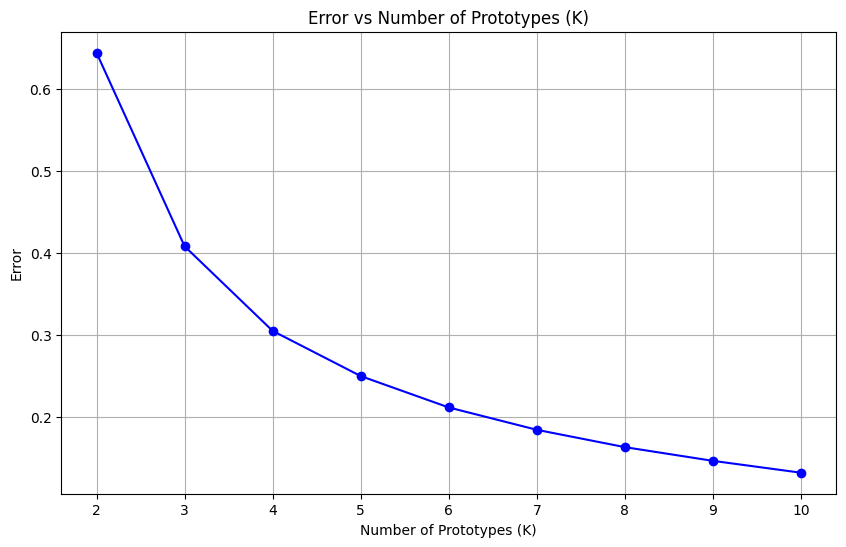

In [33]:
def test_prototypes(std_dev=0.5):
    data = generate_data(centers,std_dev)
    errors = []

    for k in range(2, 11):
        min_error = float('inf')
        for _ in range(20):
            #prototypes, clusters, errors,iteration
            _, _, error_list,_ = k_means_intialization(data, k, initialization='from_data')
            min_error = min(min_error, error_list[-1])
        errors.append((k,min_error))
    print(errors)
    return errors

# Plot the errors for K = 2 to 10
def plot_errors(errors):
    ks, error_values = zip(*errors)
    plt.figure(figsize=(10, 6))
    plt.plot(ks, error_values, marker='o', linestyle='-', color='b')
    plt.title('Error vs Number of Prototypes (K)')
    plt.xlabel('Number of Prototypes (K)')
    plt.ylabel('Error')
    plt.grid(True)
    plt.show()


plot_errors(test_prototypes(std_dev=0.5))




Does the curve give an indication of the actual number of clusters?

This is an elbow curve which is used to determine the optimal number of clusters.The "elbow" is the point where the plot transitions from a steep drop to a more gradual slop. After the elbow point, adding more clusters only slightly reduces the error, meaning you're likely splitting existing clusters unnecessarily.

The curve shows a sharp drop in error from K = 2 to K = 4, and after K = 4, the rate of decrease in error slows down significantly. This indicates that K = 4 is likely the optimal number of clusters, which makes sense given that we generated the data from concatenating 4 normal distributions. 

C:\Users\sb138\AppData\Local\Temp\ipykernel_4580\3337745618.py:27: RuntimeWarning: invalid value encountered in scalar divide
  if abs(previous_error - current_error) / previous_error <= tolerance:


[(2, 0.6431219778741792), (3, 0.41765691777913205), (4, 0.3113708519546983), (5, 0.26356983694148106), (6, 0.22655675775312908), (7, 0.1910013649756284), (8, 0.16721970160480215), (9, 0.1488141597712808), (10, 0.12989582141024272)]
[(2, 1.651437972751444), (3, 1.1043731535238777), (4, 0.8460618289699545), (5, 0.6999953805046103), (6, 0.5729907839464157), (7, 0.4996560556577657), (8, 0.4457112302066592), (9, 0.3928806247791631), (10, 0.3514893347056681)]
[(2, 0.3312441808587542), (3, 0.20623885172482218), (4, 0.10135291309462008), (5, 0.08735419286138431), (6, 0.07587421577338088), (7, 0.06687714765677408), (8, 0.06050085735124502), (9, 0.054637091205680145), (10, 0.04898495839019583)]


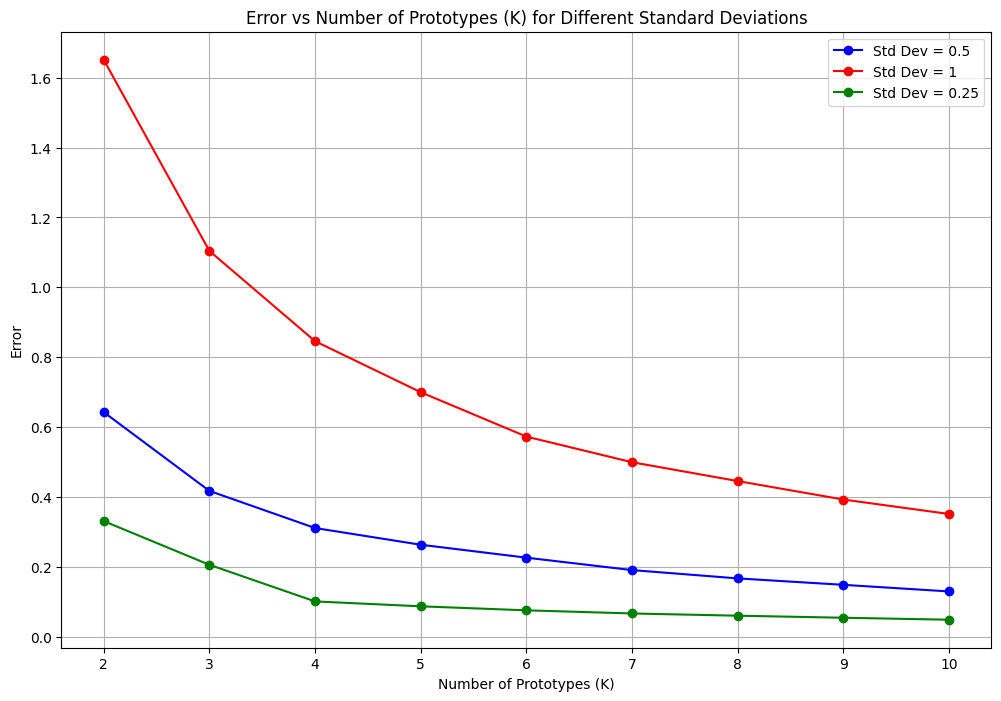

In [34]:
def plot_errors_all_stds():
    std_devs = [0.5, 1, 0.25]
    labels = ['Std Dev = 0.5', 'Std Dev = 1', 'Std Dev = 0.25']
    colors = ['b', 'r', 'g']

    plt.figure(figsize=(12, 8))

    for std_dev, label, color in zip(std_devs, labels, colors):
        errors = test_prototypes(std_dev=std_dev)
        ks, error_values = zip(*errors)
        plt.plot(ks, error_values, marker='o', linestyle='-', color=color, label=label)

    plt.title('Error vs Number of Prototypes (K) for Different Standard Deviations')
    plt.xlabel('Number of Prototypes (K)')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_errors_all_stds()

Now try the whole thing with a standard deviation 1 and 1/4 when creating the data! How
do the three function plots according to the different standard deviations differ with
regard to the elbow criterion?

Based on these plots the optimal cluster number is still 4.(and agian makes sense because we are still generating data with by concatenating 4 normal distributions)

But it is also evident that with lower standard deviation we have lower error. This is because when the data are less scattered, classification is easier and less error-prone.

1)c

C:\Users\sb138\AppData\Local\Temp\ipykernel_4580\2357192291.py:24: RuntimeWarning: invalid value encountered in scalar divide
  if abs(previous_error - current_error) / previous_error <= tolerance:


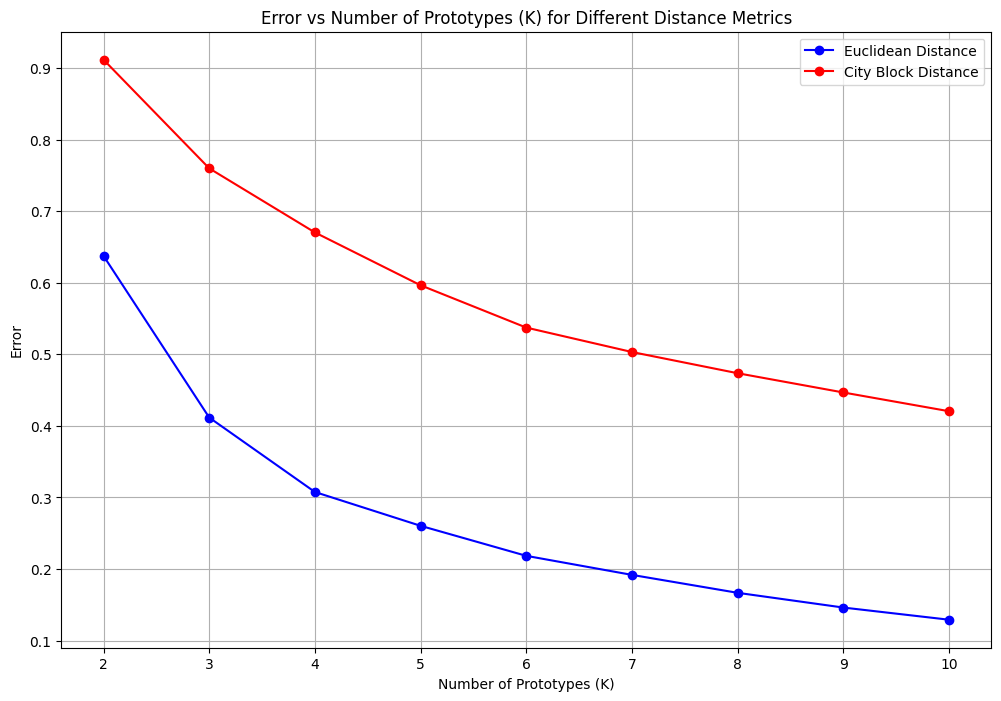

In [43]:
def assign_clusters_dist(data, prototypes, distance_metric='euclidean'):
    if distance_metric == 'cityblock':
        distances = np.sum(np.abs(data[:, np.newaxis, :] - prototypes), axis=2)  # City Block (Manhattan) distance
    else:
        distances = np.linalg.norm(data[:, np.newaxis, :] - prototypes, axis=2)  # Euclidean distance
    return np.argmin(distances, axis=1)


def k_means_dist(data, k, max_iterations=100, tolerance=1e-4, initialization='from_data', distance_metric='euclidean'):
    if initialization == 'from_data':
        prototypes = initialize_prototypes_from_data(data, k)
    else:
        prototypes = initialize_prototypes_random(k)

    previous_error = float('inf')
    errors = []

    for iteration in range(max_iterations):
        clusters = assign_clusters_dist(data, prototypes, distance_metric=distance_metric)
        prototypes = update_prototypes(data, clusters, k)
        current_error = compute_error_dist(data, clusters, prototypes, distance_metric=distance_metric)
        errors.append(current_error)

        if abs(previous_error - current_error) / previous_error <= tolerance:
            break

        previous_error = current_error

    return prototypes, clusters, errors


# Compute average error based on the specified distance metric
def compute_error_dist(data, clusters, prototypes, distance_metric='euclidean'):
    error = 0
    for i in range(len(prototypes)):
        cluster_points = data[clusters == i]
        if distance_metric == 'cityblock':
            error += np.sum(np.sum(np.abs(cluster_points - prototypes[i]), axis=1))
        else:
            error += np.sum(np.linalg.norm(cluster_points - prototypes[i], axis=1) ** 2)
    return error / len(data)


def test_prototypes_dist(std_dev=0.5, distance_metric='euclidean'):
    data = generate_data(centers,std_dev)
    #data = np.vstack([data, [10, 10]])  # Add outlier point [10, 10]
    errors = []

    for k in range(2, 11):
        min_error = float('inf')
        for _ in range(20):
            _, _, error_list = k_means_dist(data, k, initialization='from_data', distance_metric=distance_metric)
            min_error = min(min_error, error_list[-1])
        errors.append((k, min_error))

    return errors


# Plot the errors for K = 2 to 10 for different distance metrics
def plot_errors_comparison_dist(euclidean_errors, cityblock_errors):
    ks, euclidean_values = zip(*euclidean_errors)
    _, cityblock_values = zip(*cityblock_errors)

    plt.figure(figsize=(12, 8))
    plt.plot(ks, euclidean_values, marker='o', linestyle='-', color='b', label='Euclidean Distance')
    plt.plot(ks, cityblock_values, marker='o', linestyle='-', color='r', label='City Block Distance')
    plt.title('Error vs Number of Prototypes (K) for Different Distance Metrics')
    plt.xlabel('Number of Prototypes (K)')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()


np.random.seed(42)  # For reproducibility

# Test and plot errors for Euclidean distance
euclidean_errors = test_prototypes_dist(std_dev=0.5, distance_metric='euclidean')

# Test and plot errors for City Block distance
cityblock_errors = test_prototypes_dist(std_dev=0.5, distance_metric='cityblock')

# Plot comparison
plot_errors_comparison_dist(euclidean_errors, cityblock_errors)


C:\Users\sb138\AppData\Local\Temp\ipykernel_4580\2357192291.py:24: RuntimeWarning: invalid value encountered in scalar divide
  if abs(previous_error - current_error) / previous_error <= tolerance:


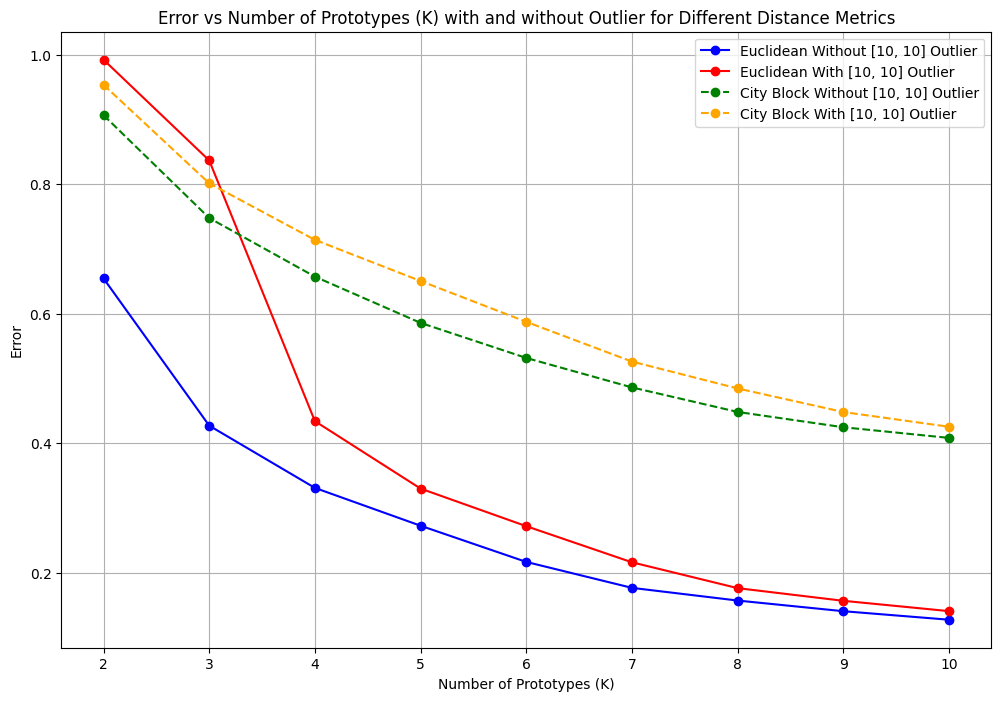

In [53]:
# Generate data without and with an outlier
data_no_outlier = generate_data(centers,0.5)
data_with_outlier = np.vstack([data_no_outlier, [10, 10]])

# Modified test_prototypes_outliner function to handle both Euclidean and City block distances
def test_prototypes_outliner(data, distance_metric='euclidean'):
    errors = []

    for k in range(2, 11):
        min_error = float('inf')
        for _ in range(20):
            _, _, error_list = k_means_dist(data, k, initialization='from_data', distance_metric=distance_metric)
            min_error = min(min_error, error_list[-1])
        errors.append((k, min_error))

    return errors

# Compute errors for all combinations
euclidean_no_outlier_errors = test_prototypes_outliner(data_no_outlier, distance_metric='euclidean')
euclidean_with_outlier_errors = test_prototypes_outliner(data_with_outlier, distance_metric='euclidean')
cityblock_no_outlier_errors = test_prototypes_outliner(data_no_outlier, distance_metric='cityblock')
cityblock_with_outlier_errors = test_prototypes_outliner(data_with_outlier, distance_metric='cityblock')

# Modified plot_comparison_outliner function to plot all four curves
def plot_comparison_outliner(euclidean_no_outlier, euclidean_with_outlier, cityblock_no_outlier, cityblock_with_outlier):
    ks, euclidean_no_outlier_values = zip(*euclidean_no_outlier)
    _, euclidean_with_outlier_values = zip(*euclidean_with_outlier)
    _, cityblock_no_outlier_values = zip(*cityblock_no_outlier)
    _, cityblock_with_outlier_values = zip(*cityblock_with_outlier)

    plt.figure(figsize=(12, 8))
    
    # Plot Euclidean distance
    plt.plot(ks, euclidean_no_outlier_values, marker='o', linestyle='-', color='b', label='Euclidean Without [10, 10] Outlier')
    plt.plot(ks, euclidean_with_outlier_values, marker='o', linestyle='-', color='r', label='Euclidean With [10, 10] Outlier')
    
    # Plot City block distance
    plt.plot(ks, cityblock_no_outlier_values, marker='o', linestyle='--', color='g', label='City Block Without [10, 10] Outlier')
    plt.plot(ks, cityblock_with_outlier_values, marker='o', linestyle='--', color='orange', label='City Block With [10, 10] Outlier')

    plt.title('Error vs Number of Prototypes (K) with and without Outlier for Different Distance Metrics')
    plt.xlabel('Number of Prototypes (K)')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the plotting function
plot_comparison_outliner(euclidean_no_outlier_errors, euclidean_with_outlier_errors, cityblock_no_outlier_errors, cityblock_with_outlier_errors)


From the two plots it can be conclouded that eventhough city block distance has a higher error rate, it works better when we have an outlier in the data and the Euclidean distance metric is sensitive to outliers.
 
behaviour around k=4:
Euclidean : With the outlier, the error for K=4 is notably higher because one of the prototypes may be dragged toward the outlier, disrupting the cluster assignments for other points.

City Block :  maintains a more gradual, linear descent. This suggests that the City Block metric is less sensitive to the addition of new prototypes at this critical point. 
The City Block metric appears more robust to outliers in terms of maintaining consistent behavior, though at the cost of higher overall error rates


task 2

C:\Users\sb138\AppData\Local\Temp\ipykernel_4580\2137557168.py:48: RuntimeWarning: invalid value encountered in scalar divide
  if abs(previous_error - current_error) / previous_error <= tolerance:


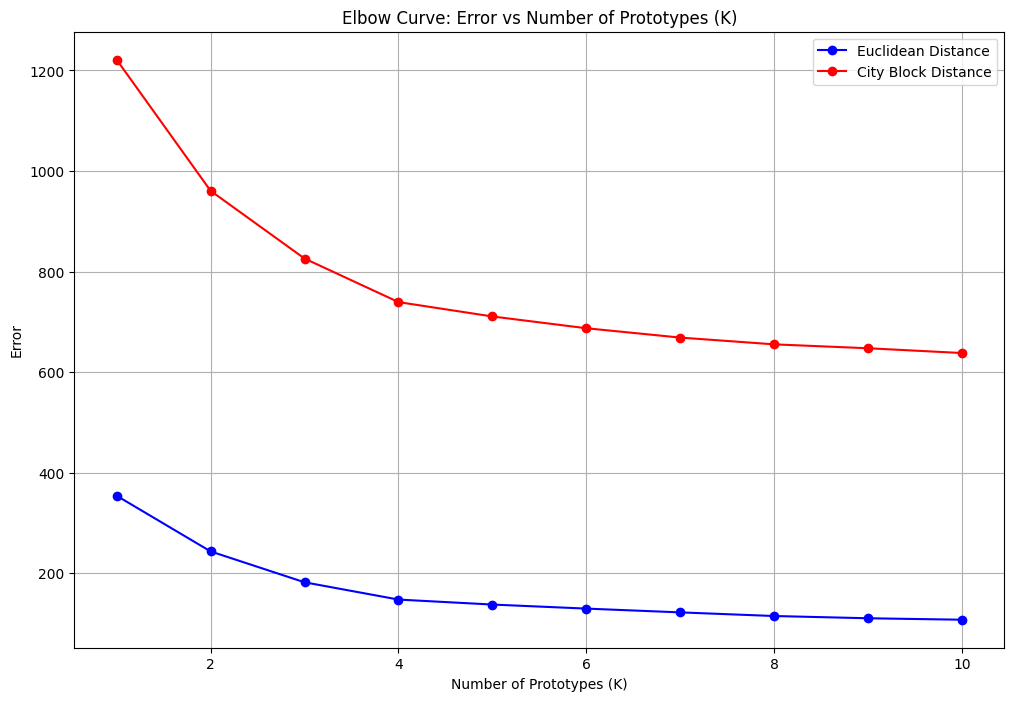

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from GexprData.csv
data = np.genfromtxt('GexprData.csv', delimiter=',', skip_header=1)

# Test the procedure for different numbers of prototypes K = 2 to 10 for both metrics
def test_prototypes_combined(data):
    # Euclidean distance
    euclidean_errors = test_prototypes_outliner(data, distance_metric='euclidean')
    # City Block (Manhattan) distance
    cityblock_errors = test_prototypes_outliner(data, distance_metric='cityblock')
    
    return euclidean_errors, cityblock_errors

# Plot the errors for K = 2 to 10 for both distance metrics
def plot_elbow_curves(euclidean_errors, cityblock_errors):
    ks, euclidean_values = zip(*euclidean_errors)
    _, cityblock_values = zip(*cityblock_errors)

    plt.figure(figsize=(12, 8))
    plt.plot(ks, euclidean_values, marker='o', linestyle='-', color='b', label='Euclidean Distance')
    plt.plot(ks, cityblock_values, marker='o', linestyle='-', color='r', label='City Block Distance')
    plt.title('Elbow Curve: Error vs Number of Prototypes (K)')
    plt.xlabel('Number of Prototypes (K)')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main script
if __name__ == "__main__":
    np.random.seed(42)  # For reproducibility

    # Run the tests
    euclidean_errors, cityblock_errors = test_prototypes_combined(data)

    # Plot the elbow curves
    plot_elbow_curves(euclidean_errors, cityblock_errors)


 i think it's safe to say the optimal number of clusters is 4 for this data set. 

In [64]:
print(data.shape)

(383, 17)


Based on the reference text, specifically looking at section 3.1.2 about the yeast cell cycle data, the 384 data points represent genes whose expression levels peak at different time points corresponding to the five phases of the cell cycle. These are specifically from the "five-phase criterion" subset of the yeast cell cycle data, which shows the fluctuation of expression levels over 17 time points. So each row in our GexprData.csv file represents a different gene, and the columns would likely represent the different time points at which the expression levels were measured during the cell cycle phases.

ps. it's a messy code I know. as I was going through the tasks with more requirements i decided to construct new functions based on previous ones, rather than going back editing the function and run the entire file again. 